# Predicting, Stationarity and Differencing

The test set should ideally be ate least as large as the maixmum forecast horizon required - if you are forecasting 1 year into the future, the test set should atlease have 1 year of data in length <br>
The longer the forecasting horizon, the more likely that hte predictions will be less accurate

In [38]:
import pandas as pd
import numpy as np  
%matplotlib inline

In [39]:
df = pd.read_csv("/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [40]:
# set index frequency to monthly start
df.index.freq = 'MS'

In [41]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [42]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


# Forecasting Model Setup

## 1. Crate the Train/Test split

In [43]:
# split data set into train and test sets
train_data = df.iloc[:109] # OR this format: df[:'1940-01-01']
test_data = df.iloc[108:]

## 2. Fit the model to the training data

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [45]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                    trend='mul', # the other option is 'add'
                                    seasonal='mul', # the other option is 'add'
                                    seasonal_periods=12).fit() # seasonal_periods is 12 for monthly data with yearly seasonality

In [46]:
# forecast for the test set and copare against the actual values
test_predictions = fitted_model.forecast(36) # forecast 36 months (periods) into the future

In [47]:
# test_predictions is a pandas Series of predicted values for the test set
test_predictions

1958-02-01    339.143076
1958-03-01    399.281759
1958-04-01    394.233623
1958-05-01    402.545201
1958-06-01    473.128639
1958-07-01    521.795307
1958-08-01    514.513707
1958-09-01    446.217028
1958-10-01    385.431147
1958-11-01    339.645234
1958-12-01    381.455783
1959-01-01    401.210253
1959-02-01    387.159229
1959-03-01    455.812397
1959-04-01    450.049542
1959-05-01    459.537880
1959-06-01    540.114578
1959-07-01    595.671513
1959-08-01    587.358977
1959-09-01    509.392799
1959-10-01    440.000804
1959-11-01    387.732484
1959-12-01    435.462604
1960-01-01    458.013928
1960-02-01    441.973549
1960-03-01    520.346689
1960-04-01    513.767924
1960-05-01    524.599628
1960-06-01    616.584441
1960-07-01    680.007172
1960-08-01    670.517741
1960-09-01    581.513048
1960-10-01    502.296477
1960-11-01    442.627966
1960-12-01    497.115755
1961-01-01    522.859914
Freq: MS, dtype: float64

## 3. Plot the training and test data

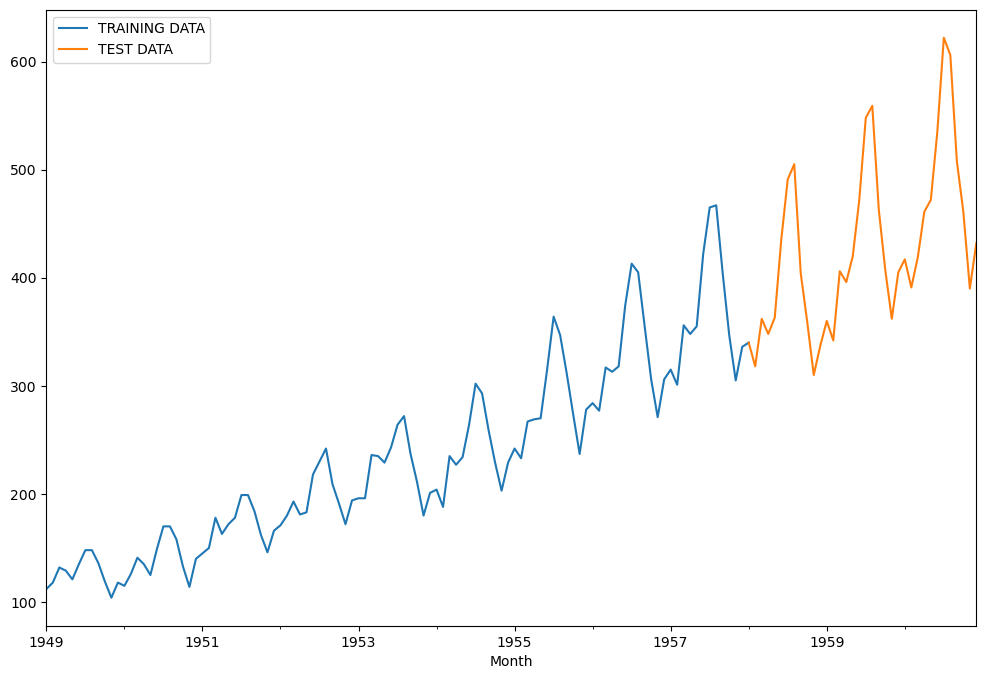

In [48]:
# plot the training and test data
import matplotlib.pyplot as plt
train_data['Thousands of Passengers'].plot(legend=True, label='TRAINING DATA', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST DATA')
plt.show()


## 4. Compare the Train/Test data with the predictions (test_prediction)

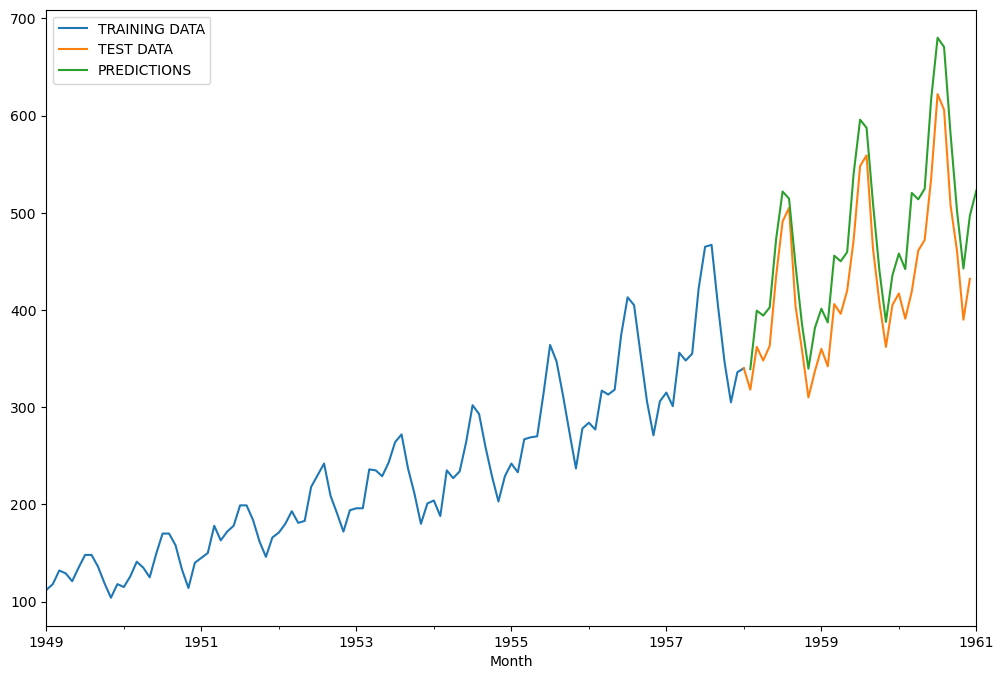

In [49]:
# plot the training and test data
train_data['Thousands of Passengers'].plot(legend=True, label='TRAINING DATA', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST DATA')

# plot the predictions - note that test_predictions is a pandas Series and not a DataFrame
test_predictions.plot(legend=True, label='PREDICTIONS')
plt.show()

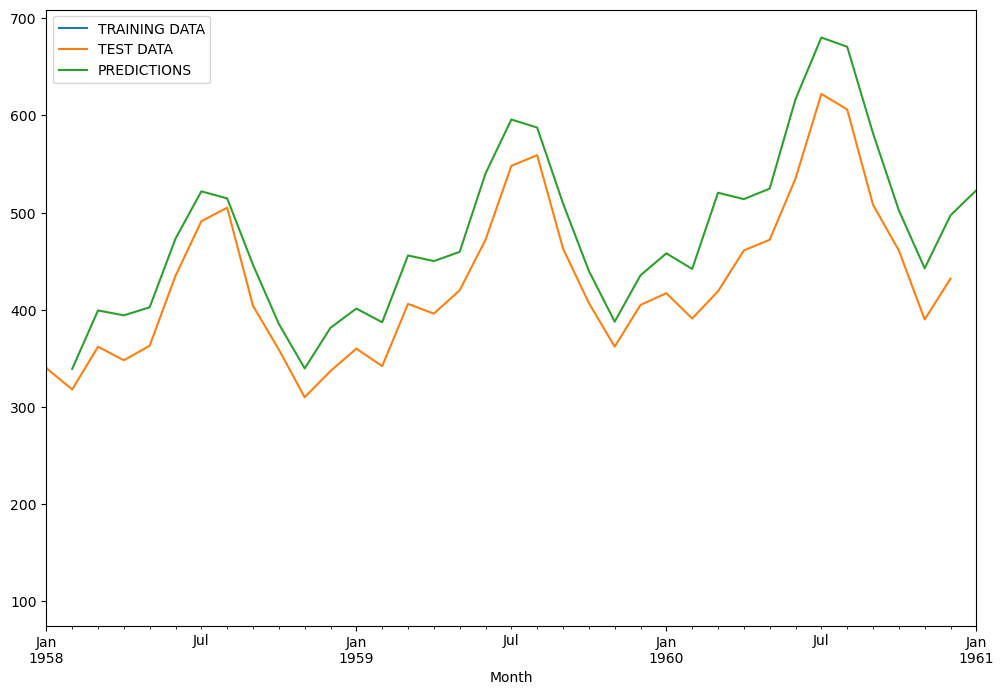

In [50]:
# changing the plot limits for better visualization
train_data['Thousands of Passengers'].plot(legend=True, label='TRAINING DATA', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST DATA')

# plot the predictions - note that test_predictions is a pandas Series and not a DataFrame
test_predictions.plot(legend=True, label='PREDICTIONS', xlim=['1958-01-01','1961-01-01'])
plt.show()

## 5. Calculate the evalutation metrics to quantify how far off predictions are compared to the test data

Most Common Evaluation metrics for time series (regression):
* Mean Absolute Error (MAE) - average absolute value of the difference in the errors (hard to pick up on the few prediciton errors that may have been very large)
* Mean Squared Error (MSE) - average of the squared errors - punishes the model for large errors so they become more obvious. (also squares the units which makes it hard to interpret)
* Root Mean Squared Error (RMSE) - take the square root to account for the issue of squaring the units

Values for Forecasting continuous value on a test set:
* y - the real value of the test data
* y_hat - predicted value from our model

How to interpret the errors:
* Compare the RMSE to the average value in you data set's test set
* Then make a decission for the acceptability of the 

Evaluating a forecast for future dates:
* It is impossilbe to evaluate the accuracy of future predictions


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
# mean absolute error (MAE) - by applying y and yhat
mae = mean_absolute_error(test_data, test_predictions)
mae

63.03104645250556

In [53]:
# compare against the mean of the test data
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [54]:
# mean squared error (MSE) to punish large errors more - by applying y and yhat
mse = mean_squared_error(test_data, test_predictions)
mse

5614.242291578374

In [55]:
# root mean squared error (RMSE) - by applying y and yhat
np.sqrt(mean_squared_error(test_data, test_predictions))

np.float64(74.92824762116337)

In [56]:
# compare RMSE against the standard deviation of the test data
test_data.std()

Thousands of Passengers    79.329152
dtype: float64

## 6. Predict/Forecast into the future

Re-train the model on the entire data set

In [57]:
# final model based on the full data set
final_model = ExponentialSmoothing(df['Thousands of Passengers'], 
                                   trend='mul', # the other option is 'add'
                                   seasonal='mul', # the other option is 'add'
                                   seasonal_periods=12).fit()

In [58]:
# forecast the predictions
forecast_predictions = final_model.forecast(36) # forecast 36 months (periods) into the future

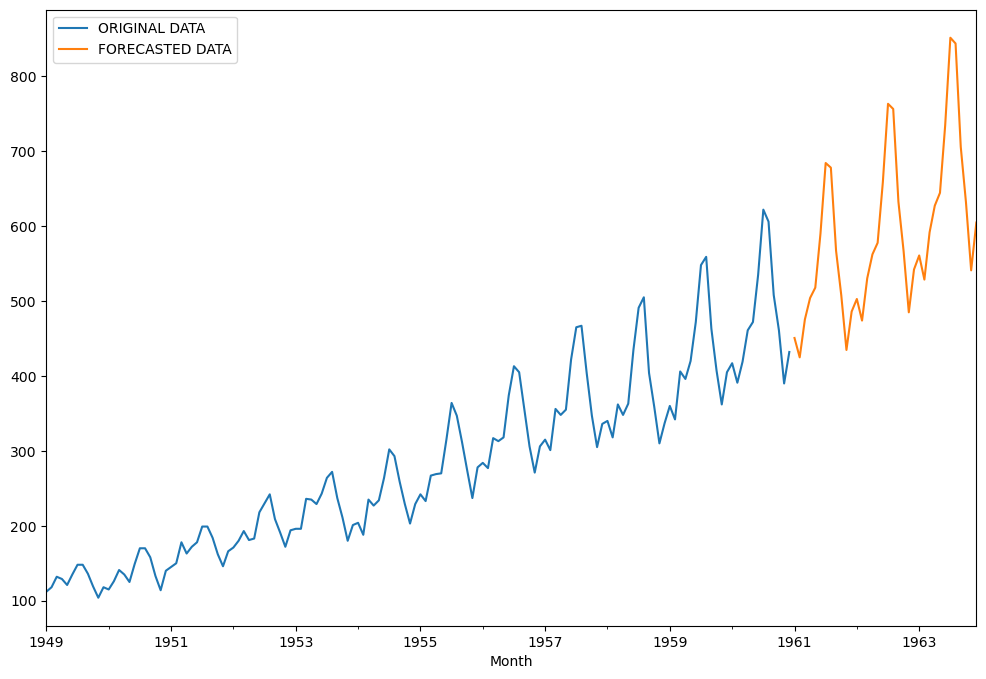

In [59]:
# plot the original data
df['Thousands of Passengers'].plot(legend=True, label='ORIGINAL DATA', figsize=(12,8))
# plot the forecasted data
forecast_predictions.plot(legend=True, label='FORECASTED DATA')
plt.show()

### Stationarity

* Data set does not exhibit trends or seasonality
* Fluctuations in the data are entirely due to outside forces and noise

In [60]:
# example of stationary data
df2 = pd.read_csv("/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/samples.csv", index_col=0, parse_dates=True)

In [61]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


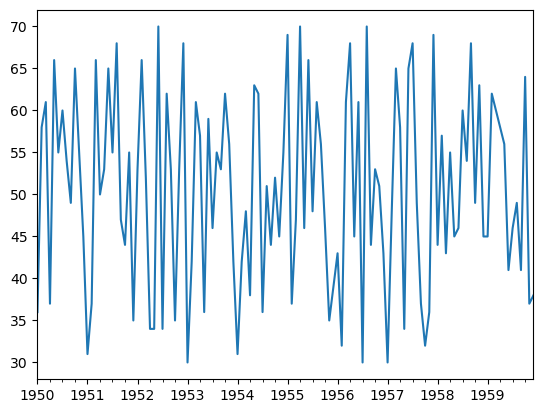

In [62]:
df2['a'].plot()
plt.show()

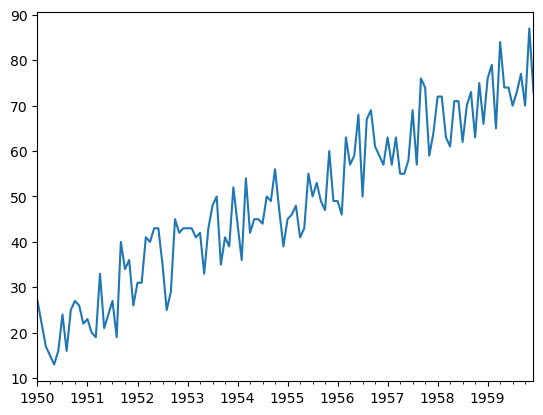

In [63]:
# example of non-stationary data
df2['b'].plot()
plt.show()

### Differencing

* Non-stationaty data can be made to look like strationary dat through differencing
* Calculates the difference between consecutive points

In [64]:
from statsmodels.tsa.statespace.tools import diff

In [65]:
# First order difference: take the dataset and subtract from it the dataset shifted forward by one
df2['b'] - df2['b'].shift(1) # 1 is the order of differencing

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

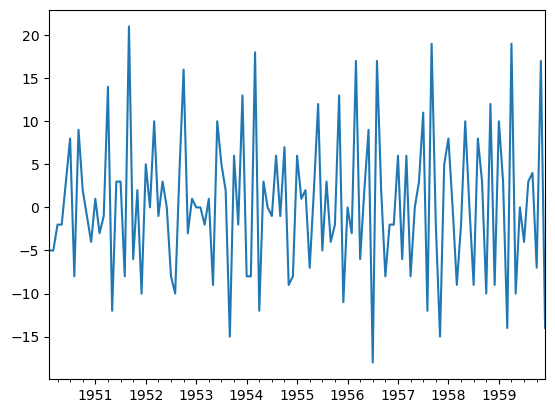

In [67]:
# instead of doing it manually, we can use the diff function
diff(df2['b'], k_diff=1).plot()

# plotting the differenced data shows the dataset is now stationary
plt.show()